In [5]:
#Numpy - for scientific computing
import numpy as np
import scipy

#For image reading and analysis
import glob
import skimage.io
import skimage.filters as sf
from skimage import io, measure, filters, transform, morphology

#Matplotlib plotting packages
import matplotlib.pyplot as plt

# For loading bars
from tqdm.notebook import tqdm as tqdm

# For creating DataFrames
import pandas as pd

import os

In [8]:
def find_all_csv(root_directory):
    """
    Finds all .tif files in root_directory and lists paths. Does not
    work if .tif files are further embedded in subdirectories within
    root_directory
    """
    csv_list = []

    for root_path, _, files in os.walk(root_directory):
        for f in files:
            if f.endswith('.csv'):
                csv_list.append(os.path.join(root_path,f))

    return csv_list


In [9]:
csv_list = find_all_csv('../../analyzed_data/gliding/soichi_data')

In [21]:
df_ls = []
for csv in csv_list:
    csv_df = pd.read_csv(csv)
    csv_df['file'] = csv.split('/')[-1]
    df_ls.append(csv_df)
df=pd.concat(df_ls)

In [46]:
df

,Unnamed: 0,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,label,speed (nm/s),r^2,num points,skele r^2,file
0,0,21,24.221717,1.991488,36.523810,143.000000,1.564259,9,27.629624,0.987493,47,0.845893,2023-Feb27NcdiLid_500uM_MT200_2-start50_stop10...
1,1,39,37.620773,3.807190,49.410256,236.820513,-0.874655,10,33.678869,0.972512,51,0.902548,2023-Feb27NcdiLid_500uM_MT200_2-start50_stop10...
2,2,14,19.658691,2.134545,42.071429,276.357143,0.821768,11,29.538306,0.978481,31,0.935512,2023-Feb27NcdiLid_500uM_MT200_2-start50_stop10...
3,3,19,22.608419,1.101794,43.368421,406.000000,-1.321088,12,29.499291,0.993398,46,0.767118,2023-Feb27NcdiLid_500uM_MT200_2-start50_stop10...
4,5,19,26.730417,1.004171,73.000000,430.263158,-0.610535,17,21.367104,0.961157,51,0.930057,2023-Feb27NcdiLid_500uM_MT200_2-start50_stop10...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,59,22,28.696336,3.121446,467.090909,212.772727,-0.858067,120,22.676537,0.970015,50,0.845848,2023-Feb27NcdiLid_500uM_MT200_8-start51_stop10...
35,60,31,36.304745,1.728995,477.000000,492.129032,-0.170897,121,31.282081,0.982309,51,0.805155,2023-Feb27NcdiLid_500uM_MT200_8-start51_stop10...
36,61,10,13.212194,1.495968,470.800000,392.100000,0.707556,123,20.619298,0.919122,19,0.874728,2023-Feb27NcdiLid_500uM_MT200_8-start51_stop10...
37,62,22,29.239536,1.815894,490.136364,268.500000,1.049863,128,20.308341,0.862667,51,0.673105,2023-Feb27NcdiLid_500uM_MT200_8-start51_stop10...


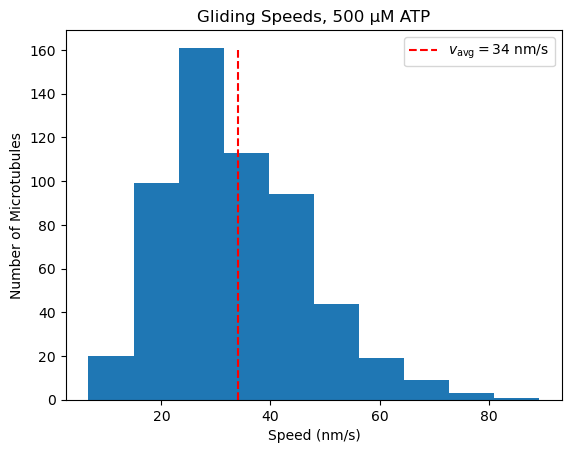

In [45]:
#plot a histogram
n_per_bin, bins,_ = plt.hist(df['speed (nm/s)'])

#put a line at the average speed
avgspeed = np.average(df['speed (nm/s)'])
plt.plot([avgspeed, avgspeed], [0,np.max(n_per_bin)], color='r', label = r'$v_{\mathrm{avg}}=$' + str(round(avgspeed)) + ' nm/s', linestyle='--')

#Axis labels
plt.title('Gliding Speeds, 500 µM ATP')
plt.xlabel('Speed (nm/s)')
plt.ylabel('Number of Microtubules')
plt.legend()

In [48]:
v_avg = []
for file in np.unique(df['file']):
    vavg = np.average(df[df['file']==file]['speed (nm/s)'])
    v_avg.append(vavg)
v_avg = np.array(v_avg)

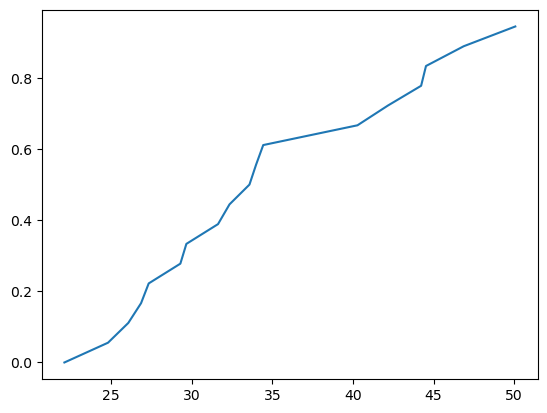

In [52]:
plt.plot(np.sort(v_avg), np.arange(len(v_avg))/len(v_avg),)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

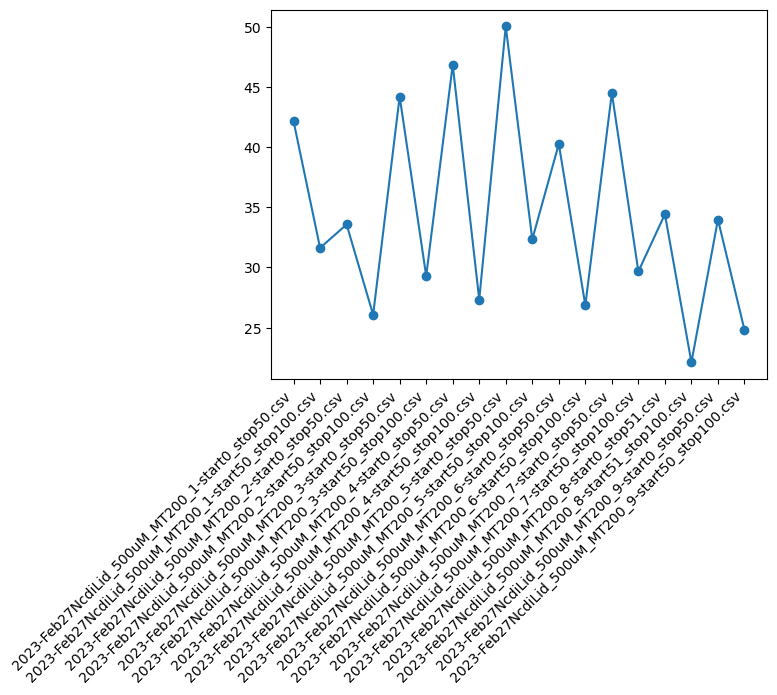

In [55]:
plt.scatter(np.unique(df['file']), v_avg)
plt.plot(np.unique(df['file']), v_avg)
plt.xticks(rotation=45, ha='right')

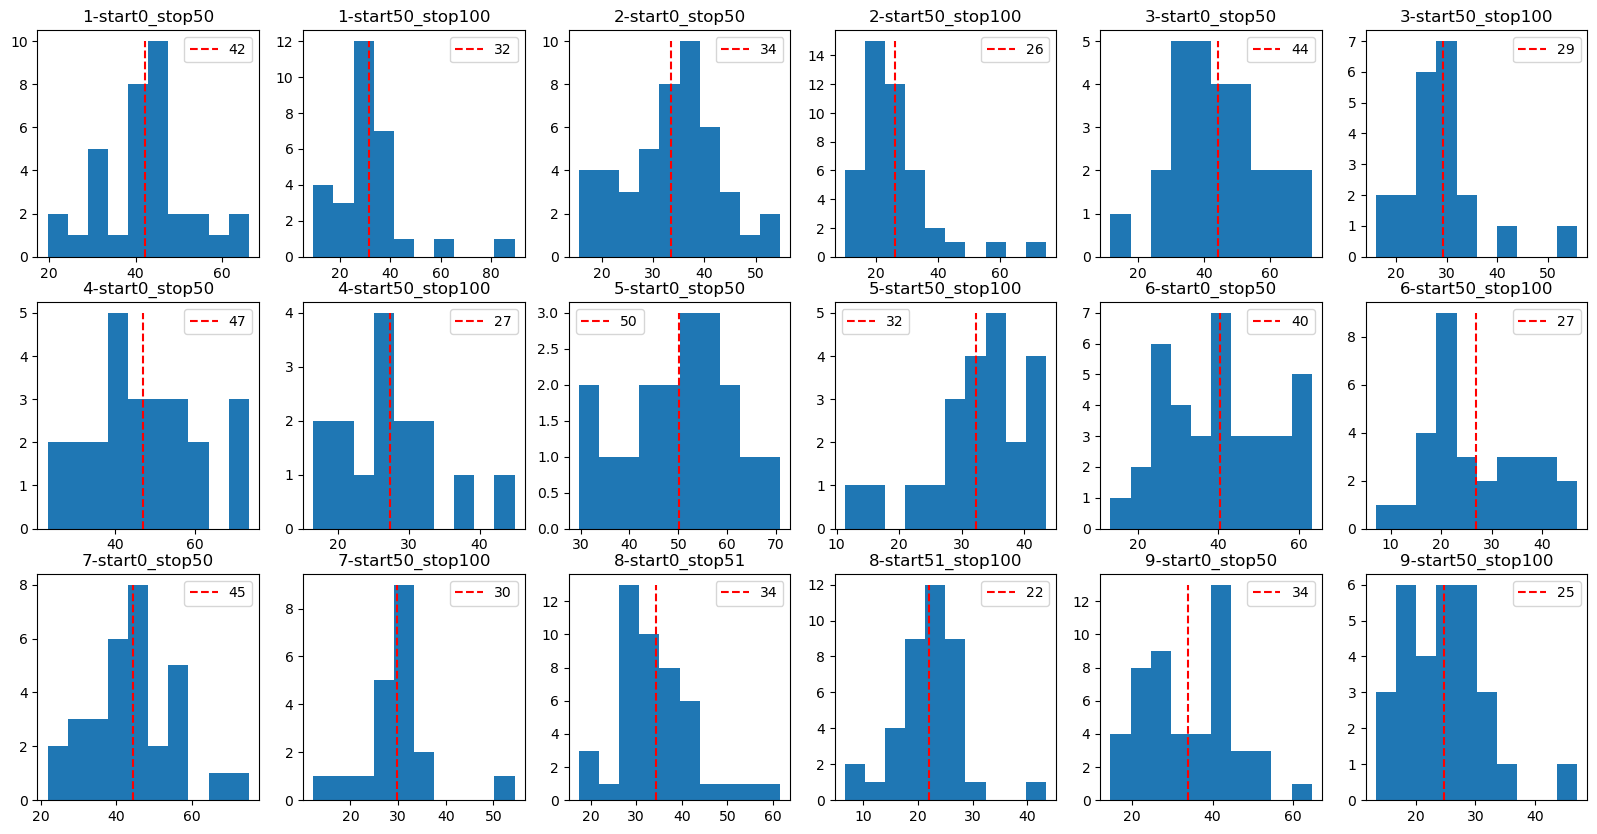

In [75]:
fig, ax = plt.subplots(3, 6, figsize = (20,10))
j=0
k=0
for i, file in enumerate(np.unique(df['file'])):  
    if i%6==0 and i!=0:
        j+=1
        k=0
        
    n, bins, _ = ax[j][k].hist(df[df['file']==file]['speed (nm/s)'])
    ax[j][k].set_title(file.split('MT200_')[1].split('.')[0])
    ax[j][k].plot([v_avg[i], v_avg[i]], [0, np.max(n)], color='r', linestyle='--', label=str(round(v_avg[i])))
    ax[j][k].legend()
    k+=1
     

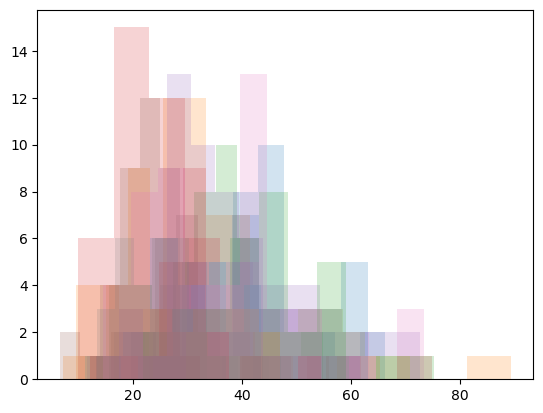

In [77]:
for i, file in enumerate(np.unique(df['file'])):  
    n, bins, _ = plt.hist(df[df['file']==file]['speed (nm/s)'], alpha=0.2)